In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf
from columnCleaner import columnCleaner as cc

In [198]:
normalize = lambda col:(col-col.mean())/col.std()
normed_obs = obs.apply(normalize, axis = 0)

In [212]:
%load_ext autoreload
%autoreload 2

In [186]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=408cf49ee56509110af1f5b48284dcfc7843dd61ef57ba4c64f58e79bf1a5615
  Stored in directory: /Users/brianhuang/Library/Caches/pip/wheels/7e/d5/f4/f628965651f61ae35c2bdc73571ce1a2026e1550a336b5ad4b
  Created wheel for multitasking: filename=multitasking-0.0.9-py3-none-any.whl size=8367 sha256=9859c15ab5f098881ff81cc30f2677d4c7d94141f76d54c4ee1e935216a71484
  Stored in directory: /Users/brianhuang/Library/Caches/pip/wheels/57/6d/a3/a39b839cc75274d2acfb1c58bfead2f726c6577fe8c4723f13
Successfully built yfinance multitasking


In [199]:
ticker = yf.Ticker("SPY") #grab the spy
hist = ticker.history(start="2011-02-14",  end="2020-04-01") #sp500 plot

In [200]:
#2011-02-14 is where the SP500 recordings start
observations = pd.read_csv("data/observations_train.csv")
series = pd.read_csv("data/series.csv")
observationsTest = pd.read_csv("data/observations_test.csv")
#load csvs

observations['date'] = pd.to_datetime(observations['date']) #convert to date time
observationsTest['date'] = pd.to_datetime(observationsTest['date'])
obs = observations.pivot(values = "value", index = "date", columns = "series_id") #pivot the table
test_obs = observationsTest.pivot(values = "value", index = "date", columns = "series_id") #pivot the table 

normalize = lambda col: (col-col.mean())/col.std()
normed_obs = obs.apply(normalize, axis=0)
#normalize our data

normed_test = test_obs.apply(normalize, axis = 0)
normed_test = normed_test[normed_test.index >= "2011-02-14"]

filteredObs = normed_obs[normed_obs.index >= "2011-02-14"]
#filter only dates where the SP500 recordings start
filteredObs

series_id,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,PCUOMINOMIN,SFTPAGRM158SFRBSF,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
date,,,,,,,,,,,,,,,,,,,,,
2011-02-14,-0.068511,NaN,-0.191647,NaN,NaN,NaN,NaN,NaN,-0.772034,0.753857,...,NaN,NaN,-1.283833,0.475112,-0.619011,NaN,NaN,NaN,NaN,-0.360459
2011-02-15,0.069513,NaN,-0.191647,NaN,NaN,NaN,NaN,NaN,-0.781610,0.765348,...,NaN,NaN,-1.294698,0.475112,-0.619011,NaN,NaN,NaN,NaN,-0.433198
2011-02-16,0.069513,NaN,-0.191647,NaN,NaN,NaN,NaN,NaN,-0.781610,0.795799,...,NaN,NaN,-1.273750,0.401980,-0.595232,0.263166,0.235511,NaN,NaN,-0.206956
2011-02-17,0.138524,NaN,-0.152405,NaN,NaN,NaN,NaN,NaN,-0.785630,0.833145,...,NaN,NaN,-1.263390,0.450735,-0.523896,NaN,NaN,NaN,NaN,-0.516571
2011-02-18,0.184532,NaN,-0.126244,NaN,NaN,NaN,NaN,NaN,-0.799699,0.868193,...,NaN,NaN,-1.256886,0.621376,-0.547675,NaN,NaN,NaN,NaN,-0.540650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-27,-1.310724,NaN,-1.198856,NaN,NaN,NaN,NaN,NaN,-0.819915,-0.149333,...,NaN,NaN,2.119963,-0.353719,-0.405003,1.719144,1.727352,NaN,NaN,-0.525902
2017-12-28,-1.310724,NaN,-1.198856,NaN,NaN,NaN,NaN,NaN,-0.848053,-0.120606,...,NaN,NaN,2.132365,-0.304964,-0.286109,NaN,NaN,NaN,NaN,-0.537741
2017-12-29,-1.310724,NaN,-1.185775,NaN,NaN,NaN,NaN,NaN,-0.878673,-0.080388,...,NaN,NaN,2.097250,-0.304964,-0.286109,NaN,NaN,NaN,NaN,-0.434402


In [201]:
mortgage30 = pd.DataFrame({'ds': filteredObs.index, 'y': filteredObs['SP500'], 'MORTGAGE30': filteredObs['MORTGAGE30US']})
mortgage30.fillna(method = 'bfill', inplace = True)
mortgage30.fillna(method = 'ffill', inplace = True)
mortgage30
#cleans our mortgage data

,ds,y,MORTGAGE30
date,,,
2011-02-14,2011-02-14,-1.283833,-0.228594
2011-02-15,2011-02-15,-1.294698,-0.228594
2011-02-16,2011-02-16,-1.273750,-0.228594
2011-02-17,2011-02-17,-1.263390,-0.228594
2011-02-18,2011-02-18,-1.256886,-0.267103
...,...,...,...
2017-12-27,2017-12-27,2.119963,-1.006478
2017-12-28,2017-12-28,2.132365,-1.006478
2017-12-29,2017-12-29,2.097250,-1.006478


In [208]:
mortgage30['MORTGAGE30']

date
2011-02-14   -0.228594
2011-02-15   -0.228594
2011-02-16   -0.228594
2011-02-17   -0.228594
2011-02-18   -0.267103
                ...   
2017-12-27   -1.006478
2017-12-28   -1.006478
2017-12-29   -1.006478
2017-12-30   -1.006478
2017-12-31   -1.006478
Name: MORTGAGE30, Length: 2513, dtype: float64

In [211]:
df = pd.DataFrame({'ds':filteredObs.index})
df.set_index('ds', inplace = True)
df['MORTGAGE30'] = mortgage30['MORTGAGE30']
df

,MORTGAGE30
ds,
2011-02-14,-0.228594
2011-02-15,-0.228594
2011-02-16,-0.228594
2011-02-17,-0.228594
2011-02-18,-0.267103
...,...
2017-12-27,-1.006478
2017-12-28,-1.006478
2017-12-29,-1.006478


In [127]:
m = Prophet()
#intialize the model

In [128]:
m.add_regressor("MORTGAGE30", standardize = False)

In [129]:
m.fit(mortgage30)
#add and fit

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [137]:
mortgage30Future = m.make_future_dataframe(periods = 822)
#822 is the takes us to 4/1/20
mortgage30Future

,ds
0,2011-02-14
1,2011-02-15
2,2011-02-16
3,2011-02-17
4,2011-02-18
...,...
3330,2020-03-28
3331,2020-03-29
3332,2020-03-30
3333,2020-03-31


In [138]:
mortgage30Future.set_index('ds', inplace = True)
#reset our index
mortgage30Future

""
ds
2011-02-14
2011-02-15
2011-02-16
2011-02-17
2011-02-18
...
2020-03-28
2020-03-29
2020-03-30


In [139]:
normed_test

series_id,AAA10Y,ASEANTOT,BAA10Y,BUSAPPWNSAUS,BUSAPPWNSAUSYY,CBUSAPPWNSAUS,CBUSAPPWNSAUSYY,CUUR0000SA0R,DEXCHUS,DEXUSEU,...,SOFR,SOFRVOL,SP500,T10YIE,TEDRATE,TLAACBW027NBOG,TLBACBW027NBOG,TSIFRGHT,UNRATE,WLEMUINDXD
date,,,,,,,,,,,,,,,,,,,,,
2018-01-02,-0.773000,NaN,-1.077745,NaN,NaN,NaN,NaN,NaN,-1.228925,1.275096,...,NaN,NaN,-0.906269,0.698390,-0.119791,NaN,NaN,NaN,NaN,-0.665019
2018-01-03,-0.773000,NaN,-1.099515,NaN,NaN,NaN,NaN,NaN,-1.188776,1.229249,...,NaN,NaN,-0.853209,0.634594,0.028565,-0.87748,-0.832705,NaN,NaN,-0.638116
2018-01-04,-0.942936,NaN,-1.143055,NaN,NaN,NaN,NaN,NaN,-1.226917,1.307189,...,NaN,NaN,-0.819589,0.730287,0.028565,NaN,NaN,NaN,NaN,-0.180379
2018-01-05,-0.874961,NaN,-1.121285,NaN,NaN,NaN,NaN,NaN,-1.242977,1.249880,...,NaN,NaN,-0.760654,0.730287,0.127470,NaN,NaN,NaN,NaN,-0.461905
2018-01-06,NaN,NaN,NaN,0.285814,0.471591,2.001652,1.176377,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.571414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-08,0.450537,NaN,-0.294022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.435078,-0.412889,2.845679,1.400141,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-09,0.450537,NaN,-0.272252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.404224,-0.548241,2.832268,1.400141,NaN,NaN,NaN,NaN,NaN,NaN
2021-02-10,0.484525,NaN,-0.250482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-1.393939,-0.669345,2.828115,1.368243,NaN,NaN,NaN,NaN,NaN,NaN


In [145]:
testmortgage30 = normed_test["MORTGAGE30US"]
testmortgage30.fillna(method = 'ffill', inplace = True)
testmortgage30.fillna(method = 'bfill', inplace = True)
testmortgage30

date
2018-01-02    0.195877
2018-01-03    0.195877
2018-01-04    0.195877
2018-01-05    0.195877
2018-01-06    0.195877
                ...   
2021-02-08   -1.611648
2021-02-09   -1.611648
2021-02-10   -1.611648
2021-02-11   -1.611648
2021-02-12   -1.611648
Name: MORTGAGE30US, Length: 1138, dtype: float64

In [162]:
mortgage30series = mortgage30['MORTGAGE30'].append(testmortgage30)

In [163]:
mortgage30series.tail()

date
2021-02-08   -1.611648
2021-02-09   -1.611648
2021-02-10   -1.611648
2021-02-11   -1.611648
2021-02-12   -1.611648
dtype: float64

In [164]:
mortgage30Future['MORTGAGE30'] = mortgage30series
mortgage30Future[mortgage30Future.index <= '2020-02-11']
mortgage30Future.reset_index(inplace = True)
mortgage30Future

,ds,MORTGAGE30
0,2011-02-14,-0.228594
1,2011-02-15,-0.228594
2,2011-02-16,-0.228594
3,2011-02-17,-0.228594
4,2011-02-18,-0.267103
...,...,...
3330,2020-03-28,-0.470833
3331,2020-03-29,-0.470833
3332,2020-03-30,-0.470833
3333,2020-03-31,-0.470833


In [180]:
mortgage30Future.iloc[2513, 1] = mortgage30Future.iloc[2514].values[1]

In [181]:
mortgage30Future.query('MORTGAGE30 != MORTGAGE30')

,ds,MORTGAGE30


In [182]:
forecastm30 = m.predict(mortgage30Future)

<AxesSubplot:xlabel='Date'>

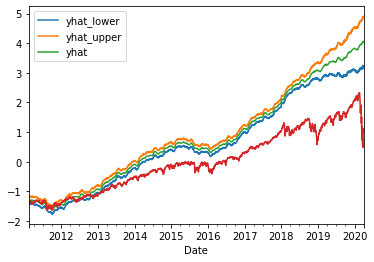

In [202]:
forecastm30[['ds', 'yhat_lower', 'yhat_upper', 'yhat']].plot('ds')
normalize(hist['Close']).plot()